# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Data Manipulation

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tp
from keras.models import Sequential
from keras.layers import Dense


In [27]:
df = pd.read_csv('CarPrice_Assignment.csv')
df 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [28]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.isnull().sum() # to count the NaN values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [31]:
a= df.columns[df.dtypes== 'O'].values
a , a.shape , type(a)

(array(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
        'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
        'fuelsystem'], dtype=object),
 (10,),
 numpy.ndarray)

In [32]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
df['doornumber']= df['doornumber'].map({'two':2,'four':4})
for i in range(10):
    if a[i]=='doornumber':
        continue
       
    df[a[i]]= labelEncoder.fit_transform(df[a[i]])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [33]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [34]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Split data

In [35]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)
df_shuffled

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,144,0,105,1,0,4,3,1,0,97.2,...,108,5,3.62,2.64,9.0,94,5200,26,32,9960.0
1,126,3,98,1,0,2,2,2,0,94.5,...,151,5,3.94,3.11,9.5,143,5500,19,27,22018.0
2,122,1,93,1,0,4,3,1,0,93.7,...,90,1,2.97,3.23,9.4,68,5500,31,38,6692.0
3,197,-2,140,1,0,4,3,2,0,104.3,...,141,5,3.78,3.15,9.5,114,5400,24,28,15985.0
4,3,1,1,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,179,3,118,1,0,2,2,2,0,102.9,...,171,5,3.27,3.35,9.3,161,5200,20,24,16558.0
201,204,-1,142,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0
202,64,0,58,0,0,4,3,1,0,98.8,...,122,3,3.39,3.39,22.7,64,4650,36,42,10795.0
203,16,0,13,1,0,4,3,2,0,103.5,...,209,5,3.62,3.39,8.0,182,5400,16,22,30760.0


In [36]:
len(df.index)

205

In [37]:
df_shuff= df_shuffled.values
df_shuff

array([[1.4400e+02, 0.0000e+00, 1.0500e+02, ..., 2.6000e+01, 3.2000e+01,
        9.9600e+03],
       [1.2600e+02, 3.0000e+00, 9.8000e+01, ..., 1.9000e+01, 2.7000e+01,
        2.2018e+04],
       [1.2200e+02, 1.0000e+00, 9.3000e+01, ..., 3.1000e+01, 3.8000e+01,
        6.6920e+03],
       ...,
       [6.4000e+01, 0.0000e+00, 5.8000e+01, ..., 3.6000e+01, 4.2000e+01,
        1.0795e+04],
       [1.6000e+01, 0.0000e+00, 1.3000e+01, ..., 1.6000e+01, 2.2000e+01,
        3.0760e+04],
       [3.5000e+01, 1.0000e+00, 4.3000e+01, ..., 3.0000e+01, 3.4000e+01,
        7.1290e+03]])

In [38]:
train_data= df_shuff[:103,:25].astype('float32')
train_data , train_data.shape

(array([[1.44e+02, 0.00e+00, 1.05e+02, ..., 5.20e+03, 2.60e+01, 3.20e+01],
        [1.26e+02, 3.00e+00, 9.80e+01, ..., 5.50e+03, 1.90e+01, 2.70e+01],
        [1.22e+02, 1.00e+00, 9.30e+01, ..., 5.50e+03, 3.10e+01, 3.80e+01],
        ...,
        [9.40e+01, 1.00e+00, 8.30e+01, ..., 5.20e+03, 3.10e+01, 3.70e+01],
        [9.90e+01, 2.00e+00, 7.00e+01, ..., 5.20e+03, 3.10e+01, 3.70e+01],
        [6.60e+01, 0.00e+00, 5.40e+01, ..., 5.00e+03, 1.90e+01, 2.70e+01]],
       dtype=float32),
 (103, 25))

In [39]:
test_data= df_shuff[103:165,:25].astype('float32')
test_data , test_data.shape

(array([[ 156.,    0.,  112., ..., 4800.,   27.,   32.],
        [  36.,    0.,   38., ..., 6000.,   30.,   34.],
        [ 114.,    0.,   85., ..., 5000.,   19.,   24.],
        ...,
        [ 193.,    0.,  135., ..., 4500.,   33.,   38.],
        [ 159.,    0.,  120., ..., 4500.,   34.,   36.],
        [ 108.,    0.,   85., ..., 5000.,   19.,   24.]], dtype=float32),
 (62, 25))

In [40]:
val_data= df_shuff[165:,:25].astype('float32')
val_data , val_data.shape

(array([[ 1.120e+02,  0.000e+00,  8.500e+01,  1.000e+00,  0.000e+00,
          4.000e+00,  3.000e+00,  2.000e+00,  0.000e+00,  1.079e+02,
          1.867e+02,  6.840e+01,  5.670e+01,  3.075e+03,  2.000e+00,
          2.000e+00,  1.200e+02,  5.000e+00,  3.460e+00,  2.190e+00,
          8.400e+00,  9.500e+01,  5.000e+03,  1.900e+01,  2.400e+01],
        [ 1.880e+02,  2.000e+00,  1.360e+02,  0.000e+00,  1.000e+00,
          4.000e+00,  3.000e+00,  1.000e+00,  0.000e+00,  9.730e+01,
          1.717e+02,  6.550e+01,  5.570e+01,  2.319e+03,  3.000e+00,
          2.000e+00,  9.700e+01,  3.000e+00,  3.010e+00,  3.400e+00,
          2.300e+01,  6.800e+01,  4.500e+03,  3.700e+01,  4.200e+01],
        [ 1.700e+01,  0.000e+00,  1.400e+01,  1.000e+00,  0.000e+00,
          2.000e+00,  3.000e+00,  2.000e+00,  0.000e+00,  1.035e+02,
          1.938e+02,  6.790e+01,  5.370e+01,  3.380e+03,  3.000e+00,
          3.000e+00,  2.090e+02,  5.000e+00,  3.620e+00,  3.390e+00,
          8.000e+00,  1.820e+02,

In [41]:
train_label= df_shuff[:103,25].astype('float32')
train_label , train_label.shape

(array([ 9960.   , 22018.   ,  6692.   , 15985.   , 16500.   , 32528.   ,
        17669.   , 37028.   , 10198.   , 28248.   ,  7126.   ,  6479.   ,
         7788.   ,  8845.   , 10898.   ,  7799.   , 11845.   ,  7775.   ,
         9538.   ,  9295.   , 16430.   , 13499.   , 17859.168,  9995.   ,
        16503.   , 12440.   ,  7463.   ,  7053.   , 13415.   ,  6918.   ,
        21485.   , 18420.   ,  6529.   ,  6095.   , 13200.   , 12764.   ,
         7957.   ,  9959.   ,  6695.   ,  6338.   , 28176.   , 15750.   ,
         7099.   , 36880.   , 10945.   ,  8495.   ,  6229.   , 17710.   ,
        16845.   , 35550.   , 40960.   , 18150.   ,  7609.   ,  7689.   ,
        11248.   ,  6989.   , 19699.   , 45400.   ,  9233.   ,  8013.   ,
        13860.   , 16500.   , 16515.   , 34028.   ,  7995.   , 10595.   ,
         7198.   ,  6692.   , 13645.   , 12290.   ,  6669.   , 11199.   ,
         6785.   , 18950.   ,  9549.   ,  8058.   , 25552.   , 24565.   ,
         9298.   ,  8558.   , 13295.  

In [42]:
test_label = df_shuff[103:165,25].astype('float32')
test_label , test_label.shape

(array([ 8778.,  7295., 16695., 14399.,  6938.,  6649., 10698., 13495.,
        14489., 12629.,  7395., 10245., 11549.,  7957., 18399.,  6377.,
         5499., 11245., 18150., 20970., 36000., 15250.,  9258., 15510.,
        11694.,  5572.,  6575.,  8921., 18620.,  9989., 14869.,  6795.,
         8358.,  5348., 12940., 18920.,  5572.,  5118.,  5195., 12170.,
         5399., 19045., 15690.,  8948., 10345., 32250., 31600., 17450.,
         7898.,  6295.,  9639.,  6488., 16925.,  7499., 11048., 23875.,
        11850., 15645.,  7295., 13845.,  7898., 11900.], dtype=float32),
 (62,))

In [43]:
val_label = df_shuff[165:,25].astype('float32')
val_label , val_label.shape

(array([15580. ,  9495. , 41315. ,  7975. ,  5151. , 22625. ,  6229. ,
         8495. , 15998. ,  9988. , 10295. , 13950. , 16900. ,  6849. ,
         6189. ,  8499. ,  6855. ,  8845. , 17075. ,  8238. ,  7738. ,
         9279. ,  8949. ,  7609. , 18344. ,  9980. , 34184. , 11595. ,
         8449. ,  8916.5, 15040. ,  8921. , 12964. , 12945. , 16630. ,
        16558. , 22470. , 10795. , 30760. ,  7129. ], dtype=float32),
 (40,))

In [44]:

mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [45]:
train_data , train_data.shape , type(train_data)

(array([[-0.18143256, -0.31152064, -0.21666475, ...,  4.386104  ,
         -0.2880325 , -0.28261217],
        [-0.19769357, -0.30881047, -0.22298847, ...,  4.6571207 ,
         -0.29435623, -0.2871291 ],
        [-0.20130712, -0.31061724, -0.22750542, ...,  4.6571207 ,
         -0.28351557, -0.27719185],
        ...,
        [-0.22660203, -0.31061724, -0.2365393 , ...,  4.386104  ,
         -0.28351557, -0.27809522],
        [-0.22208507, -0.30971384, -0.24828337, ...,  4.386104  ,
         -0.28351557, -0.27809522],
        [-0.25189692, -0.31152064, -0.2627376 , ...,  4.205426  ,
         -0.29435623, -0.2871291 ]], dtype=float32),
 (103, 25),
 numpy.ndarray)

In [46]:
test_data , test_data.shape

(array([[-0.17059189, -0.31152064, -0.21034102, ...,  4.0247483 ,
         -0.2871291 , -0.28261217],
        [-0.2789986 , -0.31152064, -0.27719185, ...,  5.1088157 ,
         -0.28441894, -0.28080538],
        [-0.20853424, -0.31152064, -0.23473254, ...,  4.205426  ,
         -0.29435623, -0.2898393 ],
        ...,
        [-0.13716649, -0.31152064, -0.18956307, ...,  3.7537315 ,
         -0.28170878, -0.27719185],
        [-0.16788171, -0.31152064, -0.2031139 , ...,  3.7537315 ,
         -0.28080538, -0.2789986 ],
        [-0.21395458, -0.31152064, -0.23473254, ...,  4.205426  ,
         -0.29435623, -0.2898393 ]], dtype=float32),
 (62, 25))

In [47]:
val_data , val_data.shape

(array([[-0.21034102, -0.31152064, -0.23473254, -0.31061724, -0.31152064,
         -0.30790707, -0.30881047, -0.30971384, -0.31152064, -0.21404491,
         -0.14285783, -0.2497288 , -0.26029843,  2.4664016 , -0.30971384,
         -0.30971384, -0.2031139 , -0.30700368, -0.3083949 , -0.3095422 ,
         -0.30393216, -0.22569863,  4.205426  , -0.29435623, -0.2898393 ],
        [-0.14168343, -0.30971384, -0.18865967, -0.31152064, -0.31061724,
         -0.30790707, -0.30881047, -0.31061724, -0.31152064, -0.22362085,
         -0.15640867, -0.25234863, -0.26120183,  1.7834393 , -0.30881047,
         -0.30971384, -0.22389185, -0.30881047, -0.3088014 , -0.30844912,
         -0.29074267, -0.25009015,  3.7537315 , -0.27809522, -0.2735783 ],
        [-0.29616302, -0.31152064, -0.2988732 , -0.31061724, -0.31152064,
         -0.30971384, -0.30881047, -0.30971384, -0.31152064, -0.21801983,
         -0.13644376, -0.25018048, -0.2630086 ,  2.7419355 , -0.30881047,
         -0.30881047, -0.12271225, -

# Model : 

In [48]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [49]:
# for no activation, relu for others
model = build_model()
model.fit(train_data, train_label,epochs=100, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_label, verbose=0)
val_mae

5524.94775390625

the price is off by a margin of 2298$

# Cross-validation (as the data is very small)

In [55]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []

num_val_samples , x.shape , y.shape


(34, (102, 25), (102,))

In [56]:
# for relu
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/100
68/68 [==============================] - 0s 2ms/step - loss: 159145184.0000 - mae: 10233.6924 - val_loss: 100238968.0000 - val_mae: 8091.9531
Epoch 2/100
68/68 [==============================] - 0s 1ms/step - loss: 116971360.0000 - mae: 7968.4946 - val_loss: 62426572.0000 - val_mae: 5517.5420
Epoch 3/100
68/68 [==============================] - 0s 1ms/step - loss: 79985848.0000 - mae: 5871.3809 - val_loss: 40535648.0000 - val_mae: 4287.9790
Epoch 4/100
68/68 [==============================] - 0s 1ms/step - loss: 59326552.0000 - mae: 5009.2295 - val_loss: 32056528.0000 - val_mae: 3974.4978
Epoch 5/100
68/68 [==============================] - 0s 1ms/step - loss: 52382992.0000 - mae: 4969.0586 - val_loss: 30738540.0000 - val_mae: 3990.3848
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 50905412.0000 - mae: 5066.7158 - val_loss: 30685452.0000 - val_mae: 4044.3464
Epoch 7/100
68/68 [==============================] - 0s 1ms/step - los

Epoch 55/100
68/68 [==============================] - 0s 1ms/step - loss: 37750092.0000 - mae: 4469.7695 - val_loss: 22738370.0000 - val_mae: 3614.5745
Epoch 56/100
68/68 [==============================] - 0s 1ms/step - loss: 37135448.0000 - mae: 4473.6567 - val_loss: 22189208.0000 - val_mae: 3511.4331
Epoch 57/100
68/68 [==============================] - 0s 1ms/step - loss: 37626656.0000 - mae: 4215.5303 - val_loss: 22496572.0000 - val_mae: 3611.2874
Epoch 58/100
68/68 [==============================] - 0s 1ms/step - loss: 36674556.0000 - mae: 4459.1665 - val_loss: 22052778.0000 - val_mae: 3546.8953
Epoch 59/100
68/68 [==============================] - 0s 1ms/step - loss: 36336332.0000 - mae: 4461.3999 - val_loss: 21581838.0000 - val_mae: 3459.3142
Epoch 60/100
68/68 [==============================] - 0s 1ms/step - loss: 36652468.0000 - mae: 4228.1533 - val_loss: 21986430.0000 - val_mae: 3589.8254
Epoch 61/100
68/68 [==============================] - 0s 1ms/step - loss: 36167072.0000 

Epoch 9/100
68/68 [==============================] - 0s 1ms/step - loss: 38387208.0000 - mae: 4547.1035 - val_loss: 68329048.0000 - val_mae: 5600.4238
Epoch 10/100
68/68 [==============================] - 0s 1ms/step - loss: 37943648.0000 - mae: 4508.0371 - val_loss: 69027712.0000 - val_mae: 5572.3115
Epoch 11/100
68/68 [==============================] - 0s 1ms/step - loss: 38419868.0000 - mae: 4403.7275 - val_loss: 68294424.0000 - val_mae: 5554.9575
Epoch 12/100
68/68 [==============================] - 0s 1ms/step - loss: 37928788.0000 - mae: 4374.5698 - val_loss: 66405016.0000 - val_mae: 5579.8955
Epoch 13/100
68/68 [==============================] - 0s 1ms/step - loss: 37224852.0000 - mae: 4416.7627 - val_loss: 67124816.0000 - val_mae: 5521.0356
Epoch 14/100
68/68 [==============================] - 0s 1ms/step - loss: 37077592.0000 - mae: 4378.2695 - val_loss: 65979836.0000 - val_mae: 5525.1055
Epoch 15/100
68/68 [==============================] - 0s 1ms/step - loss: 36584296.0000 -

Epoch 63/100
68/68 [==============================] - 0s 1ms/step - loss: 14442698.0000 - mae: 2522.8271 - val_loss: 33540442.0000 - val_mae: 3537.2485
Epoch 64/100
68/68 [==============================] - 0s 1ms/step - loss: 14008694.0000 - mae: 2462.1379 - val_loss: 30054874.0000 - val_mae: 3797.4961
Epoch 65/100
68/68 [==============================] - 0s 1ms/step - loss: 13367699.0000 - mae: 2411.4060 - val_loss: 29836890.0000 - val_mae: 3559.2322
Epoch 66/100
68/68 [==============================] - 0s 1ms/step - loss: 12955096.0000 - mae: 2462.0466 - val_loss: 32254750.0000 - val_mae: 3395.8726
Epoch 67/100
68/68 [==============================] - 0s 1ms/step - loss: 12741272.0000 - mae: 2406.5486 - val_loss: 29597116.0000 - val_mae: 3405.6313
Epoch 68/100
68/68 [==============================] - 0s 1ms/step - loss: 12579096.0000 - mae: 2343.8733 - val_loss: 29646752.0000 - val_mae: 3356.5859
Epoch 69/100
68/68 [==============================] - 0s 1ms/step - loss: 12453219.0000 

Epoch 17/100
68/68 [==============================] - 0s 1ms/step - loss: 48521344.0000 - mae: 4876.0054 - val_loss: 39526464.0000 - val_mae: 4750.5049
Epoch 18/100
68/68 [==============================] - ETA: 0s - loss: 48550440.0000 - mae: 4867.162 - 0s 1ms/step - loss: 48550440.0000 - mae: 4867.1626 - val_loss: 39395580.0000 - val_mae: 4732.3145
Epoch 19/100
68/68 [==============================] - 0s 1ms/step - loss: 47797232.0000 - mae: 4920.4087 - val_loss: 39299004.0000 - val_mae: 4674.0991
Epoch 20/100
68/68 [==============================] - 0s 1ms/step - loss: 48090248.0000 - mae: 4867.2290 - val_loss: 39136552.0000 - val_mae: 4708.9653
Epoch 21/100
68/68 [==============================] - 0s 1ms/step - loss: 47709088.0000 - mae: 4901.3120 - val_loss: 39008320.0000 - val_mae: 4712.8442
Epoch 22/100
68/68 [==============================] - 0s 1ms/step - loss: 47566612.0000 - mae: 4896.6187 - val_loss: 38885960.0000 - val_mae: 4722.3716
Epoch 23/100
68/68 [====================

68/68 [==============================] - 0s 1ms/step - loss: 41768992.0000 - mae: 4438.8838 - val_loss: 33017524.0000 - val_mae: 4257.3477
Epoch 70/100
68/68 [==============================] - 0s 1ms/step - loss: 40801876.0000 - mae: 4572.3867 - val_loss: 32933998.0000 - val_mae: 4206.0693
Epoch 71/100
68/68 [==============================] - 0s 1ms/step - loss: 40872704.0000 - mae: 4559.1748 - val_loss: 32798358.0000 - val_mae: 4201.4287
Epoch 72/100
68/68 [==============================] - 0s 1ms/step - loss: 40861180.0000 - mae: 4501.5410 - val_loss: 32594846.0000 - val_mae: 4242.0776
Epoch 73/100
68/68 [==============================] - 0s 1ms/step - loss: 41111532.0000 - mae: 4421.3809 - val_loss: 32484084.0000 - val_mae: 4222.5581
Epoch 74/100
68/68 [==============================] - 0s 1ms/step - loss: 40430824.0000 - mae: 4499.6460 - val_loss: 32337382.0000 - val_mae: 4235.6914
Epoch 75/100
68/68 [==============================] - 0s 1ms/step - loss: 40458284.0000 - mae: 4466.1

In [57]:
len(all_mae_histories)

3

In [58]:
all_scores

[3608.828254394531, 4406.277104492187, 4738.879948730469]

In [59]:
np.mean(all_scores)

4251.328435872395

for k=3 ----> 4251.328435872395
 ,for k=5 ----> 7667.279361083984
 



In [60]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


In [61]:
len(average_mae_history)

100

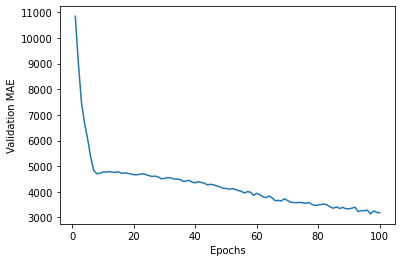

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [63]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

# Overfit

## Epoch

In [68]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 500
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/500
68/68 [==============================] - 0s 3ms/step - loss: 190456416.0000 - mae: 11589.5557 - val_loss: 125923896.0000 - val_mae: 9554.6172
Epoch 2/500
68/68 [==============================] - 0s 1ms/step - loss: 143175568.0000 - mae: 9350.5498 - val_loss: 79522928.0000 - val_mae: 6803.9609
Epoch 3/500
68/68 [==============================] - 0s 1ms/step - loss: 87993464.0000 - mae: 6421.0396 - val_loss: 42020576.0000 - val_mae: 4313.9238
Epoch 4/500
68/68 [==============================] - 0s 1ms/step - loss: 60494464.0000 - mae: 4899.4565 - val_loss: 30782274.0000 - val_mae: 3877.2151
Epoch 5/500
68/68 [==============================] - 0s 1ms/step - loss: 50697296.0000 - mae: 4938.1831 - val_loss: 29559226.0000 - val_mae: 3932.0266
Epoch 6/500
68/68 [==============================] - 0s 1ms/step - loss: 49351508.0000 - mae: 4911.0835 - val_loss: 29707460.0000 - val_mae: 4037.6484
Epoch 7/500
68/68 [==============================] - 0s 1ms/step - los

68/68 [==============================] - 0s 1ms/step - loss: 36419388.0000 - mae: 4291.6777 - val_loss: 21474980.0000 - val_mae: 3532.6128
Epoch 55/500
68/68 [==============================] - 0s 1ms/step - loss: 35625168.0000 - mae: 4327.2490 - val_loss: 21130846.0000 - val_mae: 3491.6377
Epoch 56/500
68/68 [==============================] - 0s 1ms/step - loss: 35070656.0000 - mae: 4312.7695 - val_loss: 20588356.0000 - val_mae: 3395.6206
Epoch 57/500
68/68 [==============================] - 0s 1ms/step - loss: 34687224.0000 - mae: 4300.1367 - val_loss: 20381608.0000 - val_mae: 3388.4321
Epoch 58/500
68/68 [==============================] - 0s 1ms/step - loss: 34612356.0000 - mae: 4250.2290 - val_loss: 20148924.0000 - val_mae: 3374.8047
Epoch 59/500
68/68 [==============================] - 0s 1ms/step - loss: 34389252.0000 - mae: 4202.7476 - val_loss: 20124708.0000 - val_mae: 3418.2354
Epoch 60/500
68/68 [==============================] - 0s 1ms/step - loss: 33656132.0000 - mae: 4167.9

Epoch 108/500
68/68 [==============================] - 0s 1ms/step - loss: 13567328.0000 - mae: 2474.2600 - val_loss: 9351336.0000 - val_mae: 2491.7681
Epoch 109/500
68/68 [==============================] - 0s 1ms/step - loss: 13056286.0000 - mae: 2579.9941 - val_loss: 7360147.0000 - val_mae: 2030.1737
Epoch 110/500
68/68 [==============================] - 0s 1ms/step - loss: 13798988.0000 - mae: 2400.5049 - val_loss: 8800538.0000 - val_mae: 2381.1191
Epoch 111/500
68/68 [==============================] - 0s 1ms/step - loss: 13277218.0000 - mae: 2520.9453 - val_loss: 7835519.0000 - val_mae: 2179.2458
Epoch 112/500
68/68 [==============================] - 0s 1ms/step - loss: 13499865.0000 - mae: 2428.7102 - val_loss: 8343889.0000 - val_mae: 2284.5122
Epoch 113/500
68/68 [==============================] - 0s 1ms/step - loss: 12927742.0000 - mae: 2480.0183 - val_loss: 7721508.0000 - val_mae: 2145.0952
Epoch 114/500
68/68 [==============================] - 0s 1ms/step - loss: 13275988.0000

Epoch 162/500
68/68 [==============================] - 0s 1ms/step - loss: 11771773.0000 - mae: 2251.5181 - val_loss: 6744311.5000 - val_mae: 1893.3436
Epoch 163/500
68/68 [==============================] - 0s 1ms/step - loss: 11952949.0000 - mae: 2177.2441 - val_loss: 6901306.5000 - val_mae: 1923.9487
Epoch 164/500
68/68 [==============================] - 0s 1ms/step - loss: 11695629.0000 - mae: 2247.4436 - val_loss: 8518697.0000 - val_mae: 2189.5222
Epoch 165/500
68/68 [==============================] - 0s 1ms/step - loss: 11592674.0000 - mae: 2302.6777 - val_loss: 7417647.5000 - val_mae: 2004.4042
Epoch 166/500
68/68 [==============================] - 0s 1ms/step - loss: 11901272.0000 - mae: 2250.1738 - val_loss: 8950671.0000 - val_mae: 2240.4802
Epoch 167/500
68/68 [==============================] - 0s 1ms/step - loss: 11773699.0000 - mae: 2292.3870 - val_loss: 8490999.0000 - val_mae: 2175.4260
Epoch 168/500
68/68 [==============================] - 0s 1ms/step - loss: 11872120.0000

68/68 [==============================] - 0s 1ms/step - loss: 11332224.0000 - mae: 2240.7156 - val_loss: 7963827.0000 - val_mae: 2148.7461
Epoch 216/500
68/68 [==============================] - 0s 1ms/step - loss: 10995871.0000 - mae: 2223.2798 - val_loss: 9110448.0000 - val_mae: 2297.1174
Epoch 217/500
68/68 [==============================] - 0s 1ms/step - loss: 11397246.0000 - mae: 2303.5315 - val_loss: 7920243.0000 - val_mae: 2121.0566
Epoch 218/500
68/68 [==============================] - 0s 1ms/step - loss: 11196817.0000 - mae: 2236.3484 - val_loss: 7350271.5000 - val_mae: 2033.4637
Epoch 219/500
68/68 [==============================] - 0s 1ms/step - loss: 11304788.0000 - mae: 2243.7966 - val_loss: 7292275.0000 - val_mae: 2013.4354
Epoch 220/500
68/68 [==============================] - 0s 1ms/step - loss: 11124201.0000 - mae: 2227.1023 - val_loss: 6918080.0000 - val_mae: 1950.0958
Epoch 221/500
68/68 [==============================] - 0s 1ms/step - loss: 11100228.0000 - mae: 2291.8

Epoch 269/500
68/68 [==============================] - 0s 1ms/step - loss: 10953224.0000 - mae: 2261.4578 - val_loss: 8263413.5000 - val_mae: 2142.3584
Epoch 270/500
68/68 [==============================] - 0s 1ms/step - loss: 10990266.0000 - mae: 2259.5461 - val_loss: 7433758.0000 - val_mae: 2018.6016
Epoch 271/500
68/68 [==============================] - 0s 1ms/step - loss: 10779493.0000 - mae: 2274.7437 - val_loss: 6383916.0000 - val_mae: 1853.2803
Epoch 272/500
68/68 [==============================] - 0s 1ms/step - loss: 10945749.0000 - mae: 2184.1042 - val_loss: 7580333.0000 - val_mae: 2046.8842
Epoch 273/500
68/68 [==============================] - 0s 1ms/step - loss: 10896109.0000 - mae: 2205.6699 - val_loss: 7645131.5000 - val_mae: 2046.4320
Epoch 274/500
68/68 [==============================] - 0s 1ms/step - loss: 11012518.0000 - mae: 2223.4624 - val_loss: 7803225.0000 - val_mae: 2083.4385
Epoch 275/500
68/68 [==============================] - 0s 1ms/step - loss: 10865706.0000

Epoch 323/500
68/68 [==============================] - 0s 1ms/step - loss: 10361710.0000 - mae: 2114.1113 - val_loss: 6579444.0000 - val_mae: 1895.1953
Epoch 324/500
68/68 [==============================] - 0s 1ms/step - loss: 10381772.0000 - mae: 2258.3467 - val_loss: 6129670.0000 - val_mae: 1814.2842
Epoch 325/500
68/68 [==============================] - 0s 1ms/step - loss: 10504150.0000 - mae: 2231.4741 - val_loss: 5864726.0000 - val_mae: 1774.6464
Epoch 326/500
68/68 [==============================] - 0s 1ms/step - loss: 10710776.0000 - mae: 2259.5093 - val_loss: 6510937.0000 - val_mae: 1871.0153
Epoch 327/500
68/68 [==============================] - 0s 1ms/step - loss: 10496251.0000 - mae: 2184.6907 - val_loss: 7057981.5000 - val_mae: 1950.7406
Epoch 328/500
68/68 [==============================] - 0s 1ms/step - loss: 10569511.0000 - mae: 2213.4629 - val_loss: 7212673.5000 - val_mae: 1973.2959
Epoch 329/500
68/68 [==============================] - 0s 2ms/step - loss: 10611069.0000

Epoch 377/500
68/68 [==============================] - 0s 1ms/step - loss: 10245526.0000 - mae: 2192.7637 - val_loss: 7373813.0000 - val_mae: 1994.4977
Epoch 378/500
68/68 [==============================] - 0s 1ms/step - loss: 10248129.0000 - mae: 2233.9587 - val_loss: 6250724.0000 - val_mae: 1818.1274
Epoch 379/500
68/68 [==============================] - 0s 1ms/step - loss: 10282290.0000 - mae: 2150.1187 - val_loss: 7454624.0000 - val_mae: 2002.8768
Epoch 380/500
68/68 [==============================] - 0s 1ms/step - loss: 10022207.0000 - mae: 2193.5598 - val_loss: 6610614.0000 - val_mae: 1861.0245
Epoch 381/500
68/68 [==============================] - 0s 1ms/step - loss: 10103453.0000 - mae: 2227.7429 - val_loss: 5803774.5000 - val_mae: 1768.1110
Epoch 382/500
68/68 [==============================] - 0s 1ms/step - loss: 10187165.0000 - mae: 2165.8960 - val_loss: 6511304.5000 - val_mae: 1844.4432
Epoch 383/500
68/68 [==============================] - 0s 1ms/step - loss: 10371201.0000

Epoch 431/500
68/68 [==============================] - 0s 1ms/step - loss: 10032278.0000 - mae: 2150.5051 - val_loss: 5566546.0000 - val_mae: 1705.9777
Epoch 432/500
68/68 [==============================] - 0s 1ms/step - loss: 10059158.0000 - mae: 2142.7146 - val_loss: 7008088.5000 - val_mae: 1965.5724
Epoch 433/500
68/68 [==============================] - 0s 1ms/step - loss: 9674595.0000 - mae: 2158.5000 - val_loss: 5739892.5000 - val_mae: 1726.9054
Epoch 434/500
68/68 [==============================] - 0s 1ms/step - loss: 9855735.0000 - mae: 2131.2898 - val_loss: 6078708.5000 - val_mae: 1781.2087
Epoch 435/500
68/68 [==============================] - 0s 1ms/step - loss: 9963069.0000 - mae: 2095.7607 - val_loss: 6303915.5000 - val_mae: 1838.1318
Epoch 436/500
68/68 [==============================] - 0s 1ms/step - loss: 10041864.0000 - mae: 2057.6021 - val_loss: 8106807.5000 - val_mae: 2204.8230
Epoch 437/500
68/68 [==============================] - 0s 1ms/step - loss: 9912120.0000 - m

Epoch 485/500
68/68 [==============================] - 0s 1ms/step - loss: 9428056.0000 - mae: 2102.6162 - val_loss: 5710660.0000 - val_mae: 1775.0355
Epoch 486/500
68/68 [==============================] - 0s 1ms/step - loss: 9137168.0000 - mae: 2123.8596 - val_loss: 6015680.5000 - val_mae: 1829.8359
Epoch 487/500
68/68 [==============================] - 0s 1ms/step - loss: 9250542.0000 - mae: 2068.4175 - val_loss: 6468868.0000 - val_mae: 1939.0503
Epoch 488/500
68/68 [==============================] - 0s 1ms/step - loss: 9244946.0000 - mae: 2134.8337 - val_loss: 5640966.0000 - val_mae: 1759.1680
Epoch 489/500
68/68 [==============================] - 0s 1ms/step - loss: 8635448.0000 - mae: 2142.5835 - val_loss: 4649403.0000 - val_mae: 1550.3763
Epoch 490/500
68/68 [==============================] - 0s 1ms/step - loss: 9531412.0000 - mae: 2090.9336 - val_loss: 5414821.5000 - val_mae: 1714.4111
Epoch 491/500
68/68 [==============================] - 0s 1ms/step - loss: 9513969.0000 - mae:

Epoch 39/500
68/68 [==============================] - 0s 1ms/step - loss: 30440626.0000 - mae: 3972.5151 - val_loss: 57140028.0000 - val_mae: 5177.1660
Epoch 40/500
68/68 [==============================] - 0s 1ms/step - loss: 30535784.0000 - mae: 3908.2395 - val_loss: 56998552.0000 - val_mae: 5165.8999
Epoch 41/500
68/68 [==============================] - 0s 1ms/step - loss: 30161772.0000 - mae: 3930.6365 - val_loss: 57487784.0000 - val_mae: 5127.8125
Epoch 42/500
68/68 [==============================] - 0s 1ms/step - loss: 30084320.0000 - mae: 3917.4521 - val_loss: 56861132.0000 - val_mae: 5135.4038
Epoch 43/500
68/68 [==============================] - 0s 1ms/step - loss: 30300034.0000 - mae: 3874.2151 - val_loss: 56788404.0000 - val_mae: 5123.4326
Epoch 44/500
68/68 [==============================] - 0s 1ms/step - loss: 29610056.0000 - mae: 3891.2913 - val_loss: 57954016.0000 - val_mae: 5065.4927
Epoch 45/500
68/68 [==============================] - 0s 1ms/step - loss: 29949770.0000 

Epoch 93/500
68/68 [==============================] - 0s 1ms/step - loss: 20507634.0000 - mae: 3089.8425 - val_loss: 41500516.0000 - val_mae: 4392.4985
Epoch 94/500
68/68 [==============================] - 0s 1ms/step - loss: 20074750.0000 - mae: 3170.9587 - val_loss: 42213516.0000 - val_mae: 4321.7002
Epoch 95/500
68/68 [==============================] - 0s 1ms/step - loss: 20457018.0000 - mae: 3006.0085 - val_loss: 42490112.0000 - val_mae: 4282.5107
Epoch 96/500
68/68 [==============================] - 0s 1ms/step - loss: 19549844.0000 - mae: 3090.8750 - val_loss: 42252708.0000 - val_mae: 4244.1406
Epoch 97/500
68/68 [==============================] - 0s 1ms/step - loss: 19430680.0000 - mae: 3077.7961 - val_loss: 40936984.0000 - val_mae: 4240.1592
Epoch 98/500
68/68 [==============================] - 0s 1ms/step - loss: 19247938.0000 - mae: 3006.6831 - val_loss: 39901832.0000 - val_mae: 4232.4351
Epoch 99/500
68/68 [==============================] - 0s 1ms/step - loss: 18736638.0000 

68/68 [==============================] - 0s 1ms/step - loss: 10170965.0000 - mae: 2136.0305 - val_loss: 22113480.0000 - val_mae: 2978.0449
Epoch 147/500
68/68 [==============================] - 0s 1ms/step - loss: 10086621.0000 - mae: 2203.0579 - val_loss: 22599670.0000 - val_mae: 2947.2339
Epoch 148/500
68/68 [==============================] - 0s 1ms/step - loss: 10185720.0000 - mae: 2150.0183 - val_loss: 22595066.0000 - val_mae: 2941.4006
Epoch 149/500
68/68 [==============================] - 0s 1ms/step - loss: 9759114.0000 - mae: 2192.8005 - val_loss: 24039212.0000 - val_mae: 2903.9917
Epoch 150/500
68/68 [==============================] - 0s 1ms/step - loss: 10093175.0000 - mae: 2095.3611 - val_loss: 21183382.0000 - val_mae: 2985.3547
Epoch 151/500
68/68 [==============================] - 0s 1ms/step - loss: 9855682.0000 - mae: 2186.7954 - val_loss: 22012256.0000 - val_mae: 2921.7043
Epoch 152/500
68/68 [==============================] - 0s 1ms/step - loss: 9747525.0000 - mae: 219

Epoch 199/500
68/68 [==============================] - 0s 1ms/step - loss: 8996659.0000 - mae: 2089.1750 - val_loss: 18542500.0000 - val_mae: 2732.3030
Epoch 200/500
68/68 [==============================] - 0s 1ms/step - loss: 8547899.0000 - mae: 2115.7703 - val_loss: 21970510.0000 - val_mae: 2729.6890
Epoch 201/500
68/68 [==============================] - 0s 1ms/step - loss: 9193916.0000 - mae: 2101.8140 - val_loss: 20413116.0000 - val_mae: 2708.3999
Epoch 202/500
68/68 [==============================] - 0s 1ms/step - loss: 8994400.0000 - mae: 2076.4253 - val_loss: 18978960.0000 - val_mae: 2714.1765
Epoch 203/500
68/68 [==============================] - 0s 1ms/step - loss: 8963800.0000 - mae: 2120.3989 - val_loss: 19280232.0000 - val_mae: 2705.0120
Epoch 204/500
68/68 [==============================] - 0s 1ms/step - loss: 8505464.0000 - mae: 2155.2405 - val_loss: 22790712.0000 - val_mae: 2775.2324
Epoch 205/500
68/68 [==============================] - 0s 1ms/step - loss: 9078200.0000 

Epoch 253/500
68/68 [==============================] - 0s 1ms/step - loss: 8339286.5000 - mae: 2067.7407 - val_loss: 18469890.0000 - val_mae: 2536.7083
Epoch 254/500
68/68 [==============================] - 0s 1ms/step - loss: 8285994.5000 - mae: 2041.6891 - val_loss: 17051504.0000 - val_mae: 2534.3906
Epoch 255/500
68/68 [==============================] - 0s 1ms/step - loss: 8225646.0000 - mae: 2066.6353 - val_loss: 18564344.0000 - val_mae: 2535.5215
Epoch 256/500
68/68 [==============================] - 0s 1ms/step - loss: 8245959.5000 - mae: 2026.7510 - val_loss: 19586458.0000 - val_mae: 2591.4719
Epoch 257/500
68/68 [==============================] - 0s 1ms/step - loss: 8490209.0000 - mae: 1996.8047 - val_loss: 17465712.0000 - val_mae: 2523.5840
Epoch 258/500
68/68 [==============================] - 0s 1ms/step - loss: 8258230.5000 - mae: 2036.4899 - val_loss: 17427260.0000 - val_mae: 2507.1440
Epoch 259/500
68/68 [==============================] - 0s 1ms/step - loss: 8187668.0000 

68/68 [==============================] - 0s 1ms/step - loss: 8053260.0000 - mae: 2011.0028 - val_loss: 17186332.0000 - val_mae: 2434.2554
Epoch 307/500
68/68 [==============================] - 0s 1ms/step - loss: 7988071.5000 - mae: 2018.3644 - val_loss: 18090132.0000 - val_mae: 2476.4043
Epoch 308/500
68/68 [==============================] - 0s 1ms/step - loss: 8064560.0000 - mae: 2020.0107 - val_loss: 16855298.0000 - val_mae: 2423.9153
Epoch 309/500
68/68 [==============================] - 0s 1ms/step - loss: 8066015.0000 - mae: 2028.9094 - val_loss: 17519832.0000 - val_mae: 2438.6250
Epoch 310/500
68/68 [==============================] - 0s 1ms/step - loss: 7928747.5000 - mae: 1991.9086 - val_loss: 16015258.0000 - val_mae: 2419.9597
Epoch 311/500
68/68 [==============================] - 0s 1ms/step - loss: 7953259.5000 - mae: 2045.0248 - val_loss: 16613013.0000 - val_mae: 2413.3379
Epoch 312/500
68/68 [==============================] - 0s 1ms/step - loss: 7388338.5000 - mae: 2004.84

68/68 [==============================] - 0s 1ms/step - loss: 7613321.0000 - mae: 1945.6875 - val_loss: 16489600.0000 - val_mae: 2354.8433
Epoch 360/500
68/68 [==============================] - 0s 1ms/step - loss: 7343036.0000 - mae: 1932.0363 - val_loss: 15279362.0000 - val_mae: 2439.5410
Epoch 361/500
68/68 [==============================] - 0s 1ms/step - loss: 7070976.5000 - mae: 1992.5558 - val_loss: 18533878.0000 - val_mae: 2458.1470
Epoch 362/500
68/68 [==============================] - 0s 1ms/step - loss: 7556265.5000 - mae: 1990.6016 - val_loss: 16144614.0000 - val_mae: 2368.3960
Epoch 363/500
68/68 [==============================] - ETA: 0s - loss: 7464164.0000 - mae: 2018.40 - 0s 1ms/step - loss: 7201706.5000 - mae: 1967.7961 - val_loss: 15147661.0000 - val_mae: 2394.4875
Epoch 364/500
68/68 [==============================] - 0s 1ms/step - loss: 7426656.5000 - mae: 1992.3075 - val_loss: 16008395.0000 - val_mae: 2365.6584
Epoch 365/500
68/68 [==============================] - 0

Epoch 413/500
68/68 [==============================] - 0s 1ms/step - loss: 6650622.5000 - mae: 1822.5293 - val_loss: 13941352.0000 - val_mae: 2452.6873
Epoch 414/500
68/68 [==============================] - 0s 1ms/step - loss: 6959378.0000 - mae: 1929.8810 - val_loss: 16339294.0000 - val_mae: 2326.2156
Epoch 415/500
68/68 [==============================] - 0s 1ms/step - loss: 7016410.5000 - mae: 1891.6771 - val_loss: 15730016.0000 - val_mae: 2327.4143
Epoch 416/500
68/68 [==============================] - 0s 1ms/step - loss: 6787676.0000 - mae: 1881.9062 - val_loss: 14155470.0000 - val_mae: 2411.0991
Epoch 417/500
68/68 [==============================] - 0s 1ms/step - loss: 6947332.0000 - mae: 1921.3083 - val_loss: 15887194.0000 - val_mae: 2316.5728
Epoch 418/500
68/68 [==============================] - 0s 1ms/step - loss: 6925705.5000 - mae: 1911.0414 - val_loss: 15103499.0000 - val_mae: 2323.8652
Epoch 419/500
68/68 [==============================] - 0s 1ms/step - loss: 6918074.5000 

Epoch 467/500
68/68 [==============================] - 0s 1ms/step - loss: 6498526.0000 - mae: 1853.1104 - val_loss: 14027763.0000 - val_mae: 2381.5071
Epoch 468/500
68/68 [==============================] - 0s 1ms/step - loss: 6527501.0000 - mae: 1863.3658 - val_loss: 14988698.0000 - val_mae: 2325.4875
Epoch 469/500
68/68 [==============================] - 0s 1ms/step - loss: 6602254.5000 - mae: 1855.7693 - val_loss: 14386952.0000 - val_mae: 2387.0867
Epoch 470/500
68/68 [==============================] - 0s 1ms/step - loss: 6732732.0000 - mae: 1866.3257 - val_loss: 15324772.0000 - val_mae: 2316.3137
Epoch 471/500
68/68 [==============================] - 0s 1ms/step - loss: 6549922.0000 - mae: 1867.2761 - val_loss: 14385476.0000 - val_mae: 2347.2078
Epoch 472/500
68/68 [==============================] - 0s 1ms/step - loss: 6560836.0000 - mae: 1887.6519 - val_loss: 15453555.0000 - val_mae: 2294.9526
Epoch 473/500
68/68 [==============================] - 0s 1ms/step - loss: 6581892.0000 

68/68 [==============================] - 0s 1ms/step - loss: 33241766.0000 - mae: 4053.5037 - val_loss: 25903566.0000 - val_mae: 3354.6399
Epoch 21/500
68/68 [==============================] - 0s 1ms/step - loss: 33526984.0000 - mae: 3824.4192 - val_loss: 24038800.0000 - val_mae: 3531.2302
Epoch 22/500
68/68 [==============================] - 0s 1ms/step - loss: 32287628.0000 - mae: 3842.2312 - val_loss: 23424598.0000 - val_mae: 3334.3584
Epoch 23/500
68/68 [==============================] - 0s 1ms/step - loss: 30952480.0000 - mae: 3791.3210 - val_loss: 22188412.0000 - val_mae: 3356.7302
Epoch 24/500
68/68 [==============================] - 0s 1ms/step - loss: 29566194.0000 - mae: 3809.6060 - val_loss: 21263224.0000 - val_mae: 3246.0947
Epoch 25/500
68/68 [==============================] - 0s 1ms/step - loss: 28618824.0000 - mae: 3540.8518 - val_loss: 20480304.0000 - val_mae: 3266.6663
Epoch 26/500
68/68 [==============================] - 0s 1ms/step - loss: 26596060.0000 - mae: 3675.4

Epoch 74/500
68/68 [==============================] - 0s 1ms/step - loss: 12515704.0000 - mae: 2321.7122 - val_loss: 10000199.0000 - val_mae: 2405.4709
Epoch 75/500
68/68 [==============================] - 0s 1ms/step - loss: 12044721.0000 - mae: 2309.7178 - val_loss: 10625784.0000 - val_mae: 2501.0776
Epoch 76/500
68/68 [==============================] - 0s 1ms/step - loss: 11878427.0000 - mae: 2310.9531 - val_loss: 10815238.0000 - val_mae: 2519.6331
Epoch 77/500
68/68 [==============================] - 0s 1ms/step - loss: 11953990.0000 - mae: 2351.3633 - val_loss: 10750913.0000 - val_mae: 2514.5996
Epoch 78/500
68/68 [==============================] - 0s 1ms/step - loss: 11911403.0000 - mae: 2352.8823 - val_loss: 10129858.0000 - val_mae: 2436.0571
Epoch 79/500
68/68 [==============================] - 0s 1ms/step - loss: 12008560.0000 - mae: 2341.9761 - val_loss: 12959365.0000 - val_mae: 2795.3540
Epoch 80/500
68/68 [==============================] - 0s 1ms/step - loss: 12187089.0000 

Epoch 128/500
68/68 [==============================] - 0s 1ms/step - loss: 10408438.0000 - mae: 2250.9043 - val_loss: 10376583.0000 - val_mae: 2442.1609
Epoch 129/500
68/68 [==============================] - 0s 1ms/step - loss: 11299855.0000 - mae: 2248.0415 - val_loss: 9553645.0000 - val_mae: 2333.4783
Epoch 130/500
68/68 [==============================] - 0s 1ms/step - loss: 10999298.0000 - mae: 2190.8132 - val_loss: 10389412.0000 - val_mae: 2442.2439
Epoch 131/500
68/68 [==============================] - 0s 2ms/step - loss: 10882683.0000 - mae: 2201.2939 - val_loss: 9553294.0000 - val_mae: 2331.8018
Epoch 132/500
68/68 [==============================] - 0s 1ms/step - loss: 10400304.0000 - mae: 2174.3223 - val_loss: 9517557.0000 - val_mae: 2323.8621
Epoch 133/500
68/68 [==============================] - 0s 1ms/step - loss: 11682390.0000 - mae: 2202.5962 - val_loss: 9491870.0000 - val_mae: 2321.5698
Epoch 134/500
68/68 [==============================] - 0s 1ms/step - loss: 10686738.00

Epoch 182/500
68/68 [==============================] - 0s 1ms/step - loss: 9700408.0000 - mae: 2161.8765 - val_loss: 9357880.0000 - val_mae: 2291.6558
Epoch 183/500
68/68 [==============================] - 0s 1ms/step - loss: 10211691.0000 - mae: 2087.5964 - val_loss: 9291180.0000 - val_mae: 2277.5042
Epoch 184/500
68/68 [==============================] - 0s 1ms/step - loss: 9832070.0000 - mae: 2126.4170 - val_loss: 9579434.0000 - val_mae: 2318.1011
Epoch 185/500
68/68 [==============================] - 0s 1ms/step - loss: 10546457.0000 - mae: 2056.1296 - val_loss: 9186568.0000 - val_mae: 2267.5466
Epoch 186/500
68/68 [==============================] - 0s 1ms/step - loss: 9941709.0000 - mae: 2050.8535 - val_loss: 9219961.0000 - val_mae: 2271.4741
Epoch 187/500
68/68 [==============================] - 0s 1ms/step - loss: 9809362.0000 - mae: 2013.0828 - val_loss: 10251171.0000 - val_mae: 2387.9277
Epoch 188/500
68/68 [==============================] - 0s 2ms/step - loss: 10560235.0000 - 

68/68 [==============================] - 0s 1ms/step - loss: 9421749.0000 - mae: 1977.9862 - val_loss: 9219158.0000 - val_mae: 2273.6914
Epoch 237/500
68/68 [==============================] - 0s 1ms/step - loss: 9002974.0000 - mae: 2016.0615 - val_loss: 9554561.0000 - val_mae: 2314.4180
Epoch 238/500
68/68 [==============================] - 0s 1ms/step - loss: 9492546.0000 - mae: 1998.9341 - val_loss: 9223729.0000 - val_mae: 2278.4707
Epoch 239/500
68/68 [==============================] - 0s 1ms/step - loss: 9516494.0000 - mae: 1905.4655 - val_loss: 9115351.0000 - val_mae: 2259.0515
Epoch 240/500
68/68 [==============================] - 0s 1ms/step - loss: 9615511.0000 - mae: 2048.1689 - val_loss: 9044202.0000 - val_mae: 2260.7295
Epoch 241/500
68/68 [==============================] - 0s 1ms/step - loss: 9767660.0000 - mae: 2026.1650 - val_loss: 9044423.0000 - val_mae: 2262.6418
Epoch 242/500
68/68 [==============================] - 0s 1ms/step - loss: 9277544.0000 - mae: 1971.8948 - v

Epoch 290/500
68/68 [==============================] - 0s 1ms/step - loss: 8708788.0000 - mae: 1931.8833 - val_loss: 9383863.0000 - val_mae: 2262.4922
Epoch 291/500
68/68 [==============================] - 0s 1ms/step - loss: 8663471.0000 - mae: 1911.0991 - val_loss: 9298340.0000 - val_mae: 2255.2913
Epoch 292/500
68/68 [==============================] - 0s 1ms/step - loss: 8035161.5000 - mae: 1843.7618 - val_loss: 10291496.0000 - val_mae: 2412.9861
Epoch 293/500
68/68 [==============================] - 0s 1ms/step - loss: 8332391.5000 - mae: 1929.0221 - val_loss: 8792041.0000 - val_mae: 2234.7493
Epoch 294/500
68/68 [==============================] - 0s 1ms/step - loss: 8814545.0000 - mae: 1909.0526 - val_loss: 8704649.0000 - val_mae: 2225.6287
Epoch 295/500
68/68 [==============================] - 0s 1ms/step - loss: 8828801.0000 - mae: 1851.2251 - val_loss: 8987382.0000 - val_mae: 2258.4824
Epoch 296/500
68/68 [==============================] - 0s 1ms/step - loss: 8582790.0000 - mae

68/68 [==============================] - 0s 1ms/step - loss: 7435910.0000 - mae: 1839.5492 - val_loss: 9372160.0000 - val_mae: 2318.7854
Epoch 345/500
68/68 [==============================] - 0s 1ms/step - loss: 7863975.0000 - mae: 1777.0245 - val_loss: 8481464.0000 - val_mae: 2182.2671
Epoch 346/500
68/68 [==============================] - 0s 1ms/step - loss: 7698354.0000 - mae: 1834.7723 - val_loss: 8382691.0000 - val_mae: 2159.4246
Epoch 347/500
68/68 [==============================] - 0s 1ms/step - loss: 7580299.5000 - mae: 1770.0349 - val_loss: 8747224.0000 - val_mae: 2206.3840
Epoch 348/500
68/68 [==============================] - 0s 1ms/step - loss: 7927669.5000 - mae: 1720.2546 - val_loss: 8595148.0000 - val_mae: 2188.2922
Epoch 349/500
68/68 [==============================] - 0s 1ms/step - loss: 7474889.0000 - mae: 1798.1273 - val_loss: 8829446.0000 - val_mae: 2221.0918
Epoch 350/500
68/68 [==============================] - 0s 1ms/step - loss: 7644056.0000 - mae: 1887.2383 - v

68/68 [==============================] - 0s 1ms/step - loss: 7117346.5000 - mae: 1692.3556 - val_loss: 8162796.0000 - val_mae: 2098.4216
Epoch 399/500
68/68 [==============================] - 0s 1ms/step - loss: 6646935.5000 - mae: 1662.7430 - val_loss: 8992078.0000 - val_mae: 2173.3438
Epoch 400/500
68/68 [==============================] - 0s 1ms/step - loss: 6319603.5000 - mae: 1713.0321 - val_loss: 9055852.0000 - val_mae: 2275.2898
Epoch 401/500
68/68 [==============================] - 0s 1ms/step - loss: 6843289.0000 - mae: 1781.8799 - val_loss: 8942067.0000 - val_mae: 2244.8960
Epoch 402/500
68/68 [==============================] - 0s 1ms/step - loss: 6421137.0000 - mae: 1699.2345 - val_loss: 8018536.5000 - val_mae: 2097.0674
Epoch 403/500
68/68 [==============================] - 0s 1ms/step - loss: 6280548.0000 - mae: 1697.0479 - val_loss: 8531607.0000 - val_mae: 2165.8005
Epoch 404/500
68/68 [==============================] - 0s 1ms/step - loss: 6463597.0000 - mae: 1698.8812 - v

68/68 [==============================] - 0s 1ms/step - loss: 5985959.5000 - mae: 1653.4556 - val_loss: 8356354.0000 - val_mae: 2053.3586
Epoch 453/500
68/68 [==============================] - 0s 1ms/step - loss: 6006136.0000 - mae: 1604.8485 - val_loss: 8271857.0000 - val_mae: 2072.1602
Epoch 454/500
68/68 [==============================] - 0s 1ms/step - loss: 6332536.5000 - mae: 1619.3733 - val_loss: 8415689.0000 - val_mae: 2121.7380
Epoch 455/500
68/68 [==============================] - 0s 1ms/step - loss: 5620540.5000 - mae: 1691.5704 - val_loss: 7687975.5000 - val_mae: 2011.7448
Epoch 456/500
68/68 [==============================] - 0s 1ms/step - loss: 6167299.5000 - mae: 1651.2554 - val_loss: 8107208.5000 - val_mae: 2049.4033
Epoch 457/500
68/68 [==============================] - 0s 1ms/step - loss: 6062153.0000 - mae: 1608.1890 - val_loss: 8178686.0000 - val_mae: 2098.3982
Epoch 458/500
68/68 [==============================] - 0s 1ms/step - loss: 5905437.5000 - mae: 1681.6111 - v

In [70]:
all_scores , np.mean(all_scores)

([2295.858367919922, 3132.474460449219, 2358.4678112792967], 2595.600213216146)

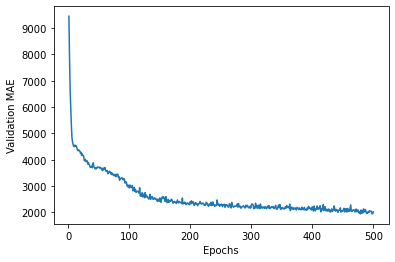

In [71]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

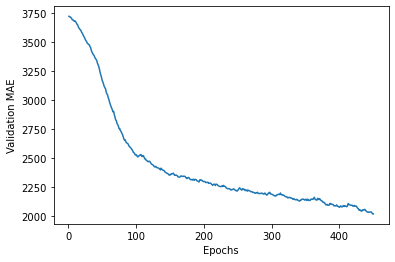

In [72]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[50:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## No. of Layers

In [80]:
# lower capacity
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    #model.add(layers.Dense(6, activation='relu')) #6491
    #model.add(layers.Dense(6, activation='relu')) #7963.930517578125
   # model.add(layers.Dense(8, activation='relu'))#7635
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [81]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []

for i in range(k):
    #print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


for 10-8 -----3300.224853515625 
     ,for 10-6 ----------- 3115.2639973958335
     , for 25-10------------------3906.263671875
              
        


In [83]:
print(all_scores)
print(np.mean(all_scores))

[3880.220703125, 4441.96923828125, 3396.60107421875]
3906.263671875


Droping Layer with 8 neuron

# activation function

In [88]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='tanh',input_shape=(train_data.shape[1],)))
    #model.add(layers.Dense(10, activation='tanh'))
    #model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(6, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [89]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []

In [90]:
# for relu
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/100
68/68 [==============================] - 0s 4ms/step - loss: 225758784.0000 - mae: 13007.2266 - val_loss: 176251264.0000 - val_mae: 11840.1592
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 225732560.0000 - mae: 13006.1816 - val_loss: 176229936.0000 - val_mae: 11839.2266
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 225712416.0000 - mae: 13005.3711 - val_loss: 176213824.0000 - val_mae: 11838.5215
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 225696528.0000 - mae: 13004.7383 - val_loss: 176200848.0000 - val_mae: 11837.9492
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 225683584.0000 - mae: 13004.2227 - val_loss: 176189712.0000 - val_mae: 11837.4639
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 225671824.0000 - mae: 13003.7695 - val_loss: 176179184.0000 - val_mae: 11837.0166
Epoch 7/100
68/68 [==============================]

Epoch 52/100
68/68 [==============================] - 0s 1ms/step - loss: 225180016.0000 - mae: 12984.8516 - val_loss: 175732096.0000 - val_mae: 11818.1045
Epoch 53/100
68/68 [==============================] - 0s 1ms/step - loss: 225169984.0000 - mae: 12984.4434 - val_loss: 175722656.0000 - val_mae: 11817.7178
Epoch 54/100
68/68 [==============================] - 0s 1ms/step - loss: 225158784.0000 - mae: 12984.0244 - val_loss: 175712928.0000 - val_mae: 11817.3057
Epoch 55/100
68/68 [==============================] - 0s 1ms/step - loss: 225148768.0000 - mae: 12983.6182 - val_loss: 175703424.0000 - val_mae: 11816.9023
Epoch 56/100
68/68 [==============================] - 0s 1ms/step - loss: 225137408.0000 - mae: 12983.1982 - val_loss: 175693280.0000 - val_mae: 11816.4707
Epoch 57/100
68/68 [==============================] - 0s 1ms/step - loss: 225126768.0000 - mae: 12982.7891 - val_loss: 175683456.0000 - val_mae: 11816.0566
Epoch 58/100
68/68 [==============================] - 0s 2ms/ste

68/68 [==============================] - 0s 2ms/step - loss: 186305120.0000 - mae: 12148.3760 - val_loss: 255028768.0000 - val_mae: 13552.4326
Epoch 5/100
68/68 [==============================] - ETA: 0s - loss: 104899464.0000 - mae: 10242.043 - 0s 997us/step - loss: 186292544.0000 - mae: 12147.8486 - val_loss: 255015728.0000 - val_mae: 13551.9512
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 186281120.0000 - mae: 12147.3789 - val_loss: 255003280.0000 - val_mae: 13551.4980
Epoch 7/100
68/68 [==============================] - 0s 1ms/step - loss: 186270240.0000 - mae: 12146.9395 - val_loss: 254991568.0000 - val_mae: 13551.0674
Epoch 8/100
68/68 [==============================] - 0s 1ms/step - loss: 186259824.0000 - mae: 12146.5029 - val_loss: 254979888.0000 - val_mae: 13550.6328
Epoch 9/100
68/68 [==============================] - 0s 1ms/step - loss: 186249360.0000 - mae: 12146.0762 - val_loss: 254968560.0000 - val_mae: 13550.2188
Epoch 10/100
68/68 [==========

Epoch 56/100
68/68 [==============================] - 0s 1ms/step - loss: 185766768.0000 - mae: 12126.2002 - val_loss: 254430208.0000 - val_mae: 13530.3291
Epoch 57/100
68/68 [==============================] - 0s 1ms/step - loss: 185756800.0000 - mae: 12125.7832 - val_loss: 254418768.0000 - val_mae: 13529.9131
Epoch 58/100
68/68 [==============================] - 0s 1ms/step - loss: 185746736.0000 - mae: 12125.3594 - val_loss: 254407376.0000 - val_mae: 13529.4980
Epoch 59/100
68/68 [==============================] - 0s 1ms/step - loss: 185736496.0000 - mae: 12124.9365 - val_loss: 254395872.0000 - val_mae: 13529.0693
Epoch 60/100
68/68 [==============================] - 0s 1ms/step - loss: 185726176.0000 - mae: 12124.5127 - val_loss: 254384400.0000 - val_mae: 13528.6396
Epoch 61/100
68/68 [==============================] - 0s 1ms/step - loss: 185715952.0000 - mae: 12124.0918 - val_loss: 254373008.0000 - val_mae: 13528.2256
Epoch 62/100
68/68 [==============================] - 0s 1ms/ste

68/68 [==============================] - 0s 1ms/step - loss: 215519584.0000 - mae: 12691.4521 - val_loss: 196276384.0000 - val_mae: 12453.4268
Epoch 9/100
68/68 [==============================] - 0s 1ms/step - loss: 215508944.0000 - mae: 12691.0459 - val_loss: 196265616.0000 - val_mae: 12452.9990
Epoch 10/100
68/68 [==============================] - 0s 1ms/step - loss: 215498832.0000 - mae: 12690.6328 - val_loss: 196255952.0000 - val_mae: 12452.6055
Epoch 11/100
68/68 [==============================] - 0s 1ms/step - loss: 215488432.0000 - mae: 12690.2285 - val_loss: 196245072.0000 - val_mae: 12452.1680
Epoch 12/100
68/68 [==============================] - 0s 1ms/step - loss: 215477760.0000 - mae: 12689.8008 - val_loss: 196235408.0000 - val_mae: 12451.7881
Epoch 13/100
68/68 [==============================] - 0s 1ms/step - loss: 215467920.0000 - mae: 12689.4072 - val_loss: 196225280.0000 - val_mae: 12451.3818
Epoch 14/100
68/68 [==============================] - 0s 1ms/step - loss: 2154

68/68 [==============================] - 0s 997us/step - loss: 214977872.0000 - mae: 12670.1016 - val_loss: 195744752.0000 - val_mae: 12432.0693
Epoch 61/100
68/68 [==============================] - 0s 1ms/step - loss: 214967936.0000 - mae: 12669.6953 - val_loss: 195734720.0000 - val_mae: 12431.6641
Epoch 62/100
68/68 [==============================] - 0s 1ms/step - loss: 214957616.0000 - mae: 12669.2861 - val_loss: 195724720.0000 - val_mae: 12431.2598
Epoch 63/100
68/68 [==============================] - 0s 1ms/step - loss: 214947296.0000 - mae: 12668.8809 - val_loss: 195714432.0000 - val_mae: 12430.8506
Epoch 64/100
68/68 [==============================] - 0s 1ms/step - loss: 214936896.0000 - mae: 12668.4668 - val_loss: 195704224.0000 - val_mae: 12430.4385
Epoch 65/100
68/68 [==============================] - 0s 1ms/step - loss: 214926208.0000 - mae: 12668.0527 - val_loss: 195693648.0000 - val_mae: 12430.0098
Epoch 66/100
68/68 [==============================] - 0s 1ms/step - loss: 2

In [91]:
np.mean(all_scores)

12595.810735677083

no need to change activation function

# add Regularizer

In [101]:
from keras import models
from keras import layers
def build_model():
    from keras import regularizers
    model = models.Sequential()
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.02), activation='relu',input_shape=(train_data.shape[1],)))
    #model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001), activation='relu')) #6491
    #model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu')) #7963.930517578125
    model.add(layers.Dense(6 ,kernel_regularizer=regularizers.l2(0.02), activation='relu'))#7635
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [102]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/100
68/68 [==============================] - 0s 5ms/step - loss: 234444144.0000 - mae: 13374.1221 - val_loss: 175722640.0000 - val_mae: 11850.4951
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 213743152.0000 - mae: 12589.3936 - val_loss: 154136736.0000 - val_mae: 10940.5244
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 188757552.0000 - mae: 11589.1309 - val_loss: 132244616.0000 - val_mae: 9918.9492
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 161668912.0000 - mae: 10402.2354 - val_loss: 106612392.0000 - val_mae: 8556.2744
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 127840000.0000 - mae: 8780.5537 - val_loss: 76769456.0000 - val_mae: 6649.4692
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 97670544.0000 - mae: 6872.0918 - val_loss: 51630080.0000 - val_mae: 4844.8438
Epoch 7/100
68/68 [==============================] - 0s 2ms

Epoch 55/100
68/68 [==============================] - 0s 2ms/step - loss: 22974890.0000 - mae: 3361.2983 - val_loss: 11744493.0000 - val_mae: 2402.9307
Epoch 56/100
68/68 [==============================] - 0s 2ms/step - loss: 23518926.0000 - mae: 3102.5859 - val_loss: 12119047.0000 - val_mae: 2789.1802
Epoch 57/100
68/68 [==============================] - 0s 2ms/step - loss: 22075306.0000 - mae: 3143.6067 - val_loss: 12734497.0000 - val_mae: 2993.4365
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 21365270.0000 - mae: 3252.7043 - val_loss: 11434854.0000 - val_mae: 2745.0811
Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 20860498.0000 - mae: 3154.5156 - val_loss: 10921104.0000 - val_mae: 2666.7520
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 20055380.0000 - mae: 3130.0947 - val_loss: 10156816.0000 - val_mae: 2479.5645
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 19587318.0000 

Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 30518578.0000 - mae: 3867.6870 - val_loss: 57791328.0000 - val_mae: 5079.1167
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 29738930.0000 - mae: 3913.1880 - val_loss: 57359948.0000 - val_mae: 5073.3359
Epoch 11/100
68/68 [==============================] - 0s 2ms/step - loss: 29790080.0000 - mae: 3833.7100 - val_loss: 56692100.0000 - val_mae: 5056.7422
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 29501402.0000 - mae: 3841.2717 - val_loss: 56046944.0000 - val_mae: 5054.8042
Epoch 13/100
68/68 [==============================] - 0s 2ms/step - loss: 29028152.0000 - mae: 3873.9021 - val_loss: 55087756.0000 - val_mae: 5068.0742
Epoch 14/100
68/68 [==============================] - 0s 2ms/step - loss: 28862542.0000 - mae: 3815.0645 - val_loss: 55411316.0000 - val_mae: 5029.8789
Epoch 15/100
68/68 [==============================] - 0s 2ms/step - loss: 28820618.0000 -

Epoch 63/100
68/68 [==============================] - 0s 2ms/step - loss: 12764196.0000 - mae: 2416.6165 - val_loss: 27398272.0000 - val_mae: 3514.6589
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 12449685.0000 - mae: 2386.8721 - val_loss: 27860282.0000 - val_mae: 3350.3855
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 12166216.0000 - mae: 2390.9346 - val_loss: 30980250.0000 - val_mae: 3239.2117
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 12361429.0000 - mae: 2270.9326 - val_loss: 25854496.0000 - val_mae: 3433.3162
Epoch 67/100
68/68 [==============================] - 0s 3ms/step - loss: 11905068.0000 - mae: 2446.7947 - val_loss: 28718430.0000 - val_mae: 3171.5393
Epoch 68/100
68/68 [==============================] - 0s 3ms/step - loss: 11925138.0000 - mae: 2259.7927 - val_loss: 25510248.0000 - val_mae: 3289.1475
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 11561976.0000 

Epoch 17/100
68/68 [==============================] - 0s 2ms/step - loss: 46324076.0000 - mae: 4790.1694 - val_loss: 37322452.0000 - val_mae: 4587.2959
Epoch 18/100
68/68 [==============================] - 0s 2ms/step - loss: 45833092.0000 - mae: 4821.6392 - val_loss: 37123740.0000 - val_mae: 4535.5991
Epoch 19/100
68/68 [==============================] - 0s 2ms/step - loss: 45818376.0000 - mae: 4789.4731 - val_loss: 36946044.0000 - val_mae: 4513.1875
Epoch 20/100
68/68 [==============================] - 0s 2ms/step - loss: 45478988.0000 - mae: 4766.2363 - val_loss: 36742120.0000 - val_mae: 4482.0161
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 45487372.0000 - mae: 4731.6250 - val_loss: 36511832.0000 - val_mae: 4498.1030
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 45094504.0000 - mae: 4732.6094 - val_loss: 36290036.0000 - val_mae: 4494.6436
Epoch 23/100
68/68 [==============================] - 0s 2ms/step - loss: 44909812.0000 

Epoch 71/100
68/68 [==============================] - 0s 2ms/step - loss: 21061402.0000 - mae: 3000.5771 - val_loss: 14616909.0000 - val_mae: 2722.6882
Epoch 72/100
68/68 [==============================] - 0s 2ms/step - loss: 19977566.0000 - mae: 3027.8240 - val_loss: 14077518.0000 - val_mae: 2667.7725
Epoch 73/100
68/68 [==============================] - 0s 2ms/step - loss: 20076904.0000 - mae: 2963.4104 - val_loss: 14251156.0000 - val_mae: 2437.5264
Epoch 74/100
68/68 [==============================] - 0s 2ms/step - loss: 19373900.0000 - mae: 2881.2532 - val_loss: 13511814.0000 - val_mae: 2448.6797
Epoch 75/100
68/68 [==============================] - 0s 2ms/step - loss: 18408226.0000 - mae: 2829.8132 - val_loss: 13058138.0000 - val_mae: 2443.8879
Epoch 76/100
68/68 [==============================] - 0s 2ms/step - loss: 17877800.0000 - mae: 2885.6311 - val_loss: 12515280.0000 - val_mae: 2438.3188
Epoch 77/100
68/68 [==============================] - 0s 2ms/step - loss: 17472192.0000 

In [103]:
np.mean(all_scores)

3830.950694580078

no need to use it

# droupout

In [105]:
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    
    
    
    # lower capacity
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='relu')) #6491
    model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(6, activation='relu')) #7963.930517578125
   # model.add(layers.Dense(8, activation='relu'))#7635
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [106]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/100
68/68 [==============================] - 0s 6ms/step - loss: 250506464.0000 - mae: 13862.1641 - val_loss: 188039200.0000 - val_mae: 12312.6729
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 239812048.0000 - mae: 13511.0332 - val_loss: 184491584.0000 - val_mae: 12171.2881
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 236063552.0000 - mae: 13412.8496 - val_loss: 181628832.0000 - val_mae: 12055.9141
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 234473520.0000 - mae: 13333.0459 - val_loss: 178961296.0000 - val_mae: 11946.4805
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 228593312.0000 - mae: 13100.9961 - val_loss: 177389232.0000 - val_mae: 11882.1074
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 226813680.0000 - mae: 13049.3145 - val_loss: 176292896.0000 - val_mae: 11841.3359
Epoch 7/100
68/68 [==============================]

68/68 [==============================] - 0s 2ms/step - loss: 142381664.0000 - mae: 8921.7021 - val_loss: 93093640.0000 - val_mae: 7731.0117
Epoch 53/100
68/68 [==============================] - 0s 2ms/step - loss: 139203296.0000 - mae: 9427.0088 - val_loss: 90779944.0000 - val_mae: 7585.4800
Epoch 54/100
68/68 [==============================] - 0s 2ms/step - loss: 149456000.0000 - mae: 9130.5762 - val_loss: 91887976.0000 - val_mae: 7657.1367
Epoch 55/100
68/68 [==============================] - 0s 2ms/step - loss: 153287008.0000 - mae: 9056.1709 - val_loss: 89381648.0000 - val_mae: 7501.8569
Epoch 56/100
68/68 [==============================] - 0s 2ms/step - loss: 169746336.0000 - mae: 10508.7461 - val_loss: 89401632.0000 - val_mae: 7504.5635
Epoch 57/100
68/68 [==============================] - 0s 2ms/step - loss: 134794784.0000 - mae: 9020.7061 - val_loss: 86952752.0000 - val_mae: 7342.3647
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 139207216.0000 - mae

68/68 [==============================] - 0s 2ms/step - loss: 126707520.0000 - mae: 9113.1689 - val_loss: 146002064.0000 - val_mae: 9037.0078
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 101830144.0000 - mae: 7373.4829 - val_loss: 129730680.0000 - val_mae: 8160.9727
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 98241928.0000 - mae: 7415.7866 - val_loss: 116008872.0000 - val_mae: 7385.7349
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 99138408.0000 - mae: 7561.5356 - val_loss: 110502152.0000 - val_mae: 7111.3882
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 94854720.0000 - mae: 7614.9062 - val_loss: 104834768.0000 - val_mae: 6829.4727
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 92541352.0000 - mae: 7420.3252 - val_loss: 100795456.0000 - val_mae: 6629.2217
Epoch 11/100
68/68 [==============================] - 0s 2ms/step - loss: 98607312.0000 - mae: 72

Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 90213256.0000 - mae: 7435.9912 - val_loss: 97146792.0000 - val_mae: 6475.7739
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 66547576.0000 - mae: 6324.3955 - val_loss: 90773568.0000 - val_mae: 6163.5625
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 83777704.0000 - mae: 6657.6479 - val_loss: 89443744.0000 - val_mae: 6102.0239
Epoch 62/100
68/68 [==============================] - 0s 2ms/step - loss: 83348136.0000 - mae: 6730.7070 - val_loss: 90348104.0000 - val_mae: 6144.4712
Epoch 63/100
68/68 [==============================] - 0s 2ms/step - loss: 84453000.0000 - mae: 6488.1758 - val_loss: 90107600.0000 - val_mae: 6133.1543
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 83154760.0000 - mae: 6734.9170 - val_loss: 90693520.0000 - val_mae: 6159.2949
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 73803960.0000 

68/68 [==============================] - 0s 2ms/step - loss: 116768776.0000 - mae: 8748.3555 - val_loss: 80455048.0000 - val_mae: 6313.6143
Epoch 13/100
68/68 [==============================] - 0s 2ms/step - loss: 126643864.0000 - mae: 8766.5195 - val_loss: 77275336.0000 - val_mae: 6118.0269
Epoch 14/100
68/68 [==============================] - 0s 2ms/step - loss: 119838624.0000 - mae: 8186.8530 - val_loss: 76049336.0000 - val_mae: 6053.7148
Epoch 15/100
68/68 [==============================] - 0s 2ms/step - loss: 132753064.0000 - mae: 8685.0273 - val_loss: 77682480.0000 - val_mae: 6190.6543
Epoch 16/100
68/68 [==============================] - 0s 2ms/step - loss: 142133536.0000 - mae: 9391.9258 - val_loss: 72590904.0000 - val_mae: 5840.0664
Epoch 17/100
68/68 [==============================] - 0s 2ms/step - loss: 138861008.0000 - mae: 8829.9736 - val_loss: 73768064.0000 - val_mae: 5927.0942
Epoch 18/100
68/68 [==============================] - 0s 2ms/step - loss: 143862048.0000 - mae:

Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 87028264.0000 - mae: 6597.9624 - val_loss: 50097956.0000 - val_mae: 4405.7866
Epoch 67/100
68/68 [==============================] - 0s 2ms/step - loss: 98076248.0000 - mae: 6713.7754 - val_loss: 49026776.0000 - val_mae: 4320.6211
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 103277824.0000 - mae: 7583.9985 - val_loss: 50305740.0000 - val_mae: 4427.3550
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 105435616.0000 - mae: 7578.2065 - val_loss: 49859960.0000 - val_mae: 4393.2632
Epoch 70/100
68/68 [==============================] - 0s 2ms/step - loss: 107587704.0000 - mae: 7784.2446 - val_loss: 49557440.0000 - val_mae: 4374.5195
Epoch 71/100
68/68 [==============================] - 0s 2ms/step - loss: 72842200.0000 - mae: 6116.8560 - val_loss: 45279888.0000 - val_mae: 4045.5952
Epoch 72/100
68/68 [==============================] - 0s 2ms/step - loss: 93697224.00

In [107]:
np.mean(all_scores)

6745.682183430989

# Evaluation

In [120]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
    #model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    #model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [121]:
x = df_shuff[103:,:25].astype('float32')
y = df_shuff[103:,25].astype('float32')
k = 3
num_val_samples = len(x) // k
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x[:i * num_val_samples],x[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y[:i * num_val_samples],y[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1,validation_data=(val_data, val_targets))
    #all_scores.append(np.mean(history.history['val_mae']))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_scores.append(np.mean(mae_history))

processing fold # 0
Epoch 1/100
68/68 [==============================] - 0s 5ms/step - loss: 176455136.0000 - mae: 10960.8418 - val_loss: 103366520.0000 - val_mae: 8306.2197
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 114787808.0000 - mae: 7933.8394 - val_loss: 60585540.0000 - val_mae: 5384.9038
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 78000432.0000 - mae: 5886.9805 - val_loss: 39726144.0000 - val_mae: 4242.9424
Epoch 4/100
68/68 [==============================] - 0s 3ms/step - loss: 60487920.0000 - mae: 4977.6445 - val_loss: 32764202.0000 - val_mae: 3968.1177
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 53084760.0000 - mae: 4865.5571 - val_loss: 30418950.0000 - val_mae: 3920.7712
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 50446288.0000 - mae: 5014.2695 - val_loss: 30019530.0000 - val_mae: 3937.3088
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - los

Epoch 55/100
68/68 [==============================] - 0s 2ms/step - loss: 23235386.0000 - mae: 3408.5317 - val_loss: 12633031.0000 - val_mae: 2809.4597
Epoch 56/100
68/68 [==============================] - 0s 2ms/step - loss: 22620880.0000 - mae: 3342.9561 - val_loss: 12303398.0000 - val_mae: 2777.8657
Epoch 57/100
68/68 [==============================] - 0s 2ms/step - loss: 22152976.0000 - mae: 3241.7029 - val_loss: 11742486.0000 - val_mae: 2662.9033
Epoch 58/100
68/68 [==============================] - 0s 2ms/step - loss: 20961618.0000 - mae: 3363.3408 - val_loss: 10986289.0000 - val_mae: 2343.8379
Epoch 59/100
68/68 [==============================] - 0s 2ms/step - loss: 21273456.0000 - mae: 3172.3201 - val_loss: 11725720.0000 - val_mae: 2788.1050
Epoch 60/100
68/68 [==============================] - 0s 2ms/step - loss: 20361186.0000 - mae: 3113.6301 - val_loss: 10502051.0000 - val_mae: 2377.9050
Epoch 61/100
68/68 [==============================] - 0s 2ms/step - loss: 20652176.0000 

Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 33947568.0000 - mae: 4187.3877 - val_loss: 62251992.0000 - val_mae: 5368.4443
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 33704632.0000 - mae: 4150.3950 - val_loss: 61717396.0000 - val_mae: 5356.8208
Epoch 11/100
68/68 [==============================] - 0s 2ms/step - loss: 33464696.0000 - mae: 4130.2881 - val_loss: 61963680.0000 - val_mae: 5306.7949
Epoch 12/100
68/68 [==============================] - 0s 2ms/step - loss: 33123046.0000 - mae: 4113.7695 - val_loss: 61098336.0000 - val_mae: 5299.6172
Epoch 13/100
68/68 [==============================] - 0s 2ms/step - loss: 32532446.0000 - mae: 4141.1997 - val_loss: 61238156.0000 - val_mae: 5259.2349
Epoch 14/100
68/68 [==============================] - 0s 2ms/step - loss: 32681382.0000 - mae: 4030.9844 - val_loss: 60531320.0000 - val_mae: 5250.0952
Epoch 15/100
68/68 [==============================] - 0s 2ms/step - loss: 32341338.0000 -

Epoch 63/100
68/68 [==============================] - 0s 2ms/step - loss: 13830156.0000 - mae: 2416.6289 - val_loss: 31168828.0000 - val_mae: 3482.3879
Epoch 64/100
68/68 [==============================] - 0s 2ms/step - loss: 13369734.0000 - mae: 2426.2983 - val_loss: 30295392.0000 - val_mae: 3487.9307
Epoch 65/100
68/68 [==============================] - 0s 2ms/step - loss: 13004266.0000 - mae: 2401.4236 - val_loss: 29175006.0000 - val_mae: 3499.1621
Epoch 66/100
68/68 [==============================] - 0s 2ms/step - loss: 12763116.0000 - mae: 2427.4146 - val_loss: 28775334.0000 - val_mae: 3470.9082
Epoch 67/100
68/68 [==============================] - 0s 2ms/step - loss: 12683818.0000 - mae: 2340.1672 - val_loss: 28294448.0000 - val_mae: 3461.9690
Epoch 68/100
68/68 [==============================] - 0s 2ms/step - loss: 12434797.0000 - mae: 2398.9409 - val_loss: 27583934.0000 - val_mae: 3465.2012
Epoch 69/100
68/68 [==============================] - 0s 2ms/step - loss: 12263161.0000 

68/68 [==============================] - 0s 2ms/step - loss: 46753032.0000 - mae: 4742.5479 - val_loss: 37712096.0000 - val_mae: 4468.6055
Epoch 17/100
68/68 [==============================] - 0s 2ms/step - loss: 46762376.0000 - mae: 4688.7520 - val_loss: 37419376.0000 - val_mae: 4541.1704
Epoch 18/100
68/68 [==============================] - 0s 2ms/step - loss: 45971848.0000 - mae: 4776.9849 - val_loss: 37290740.0000 - val_mae: 4550.3550
Epoch 19/100
68/68 [==============================] - 0s 2ms/step - loss: 45962592.0000 - mae: 4752.7822 - val_loss: 37163388.0000 - val_mae: 4551.8071
Epoch 20/100
68/68 [==============================] - 0s 2ms/step - loss: 45726284.0000 - mae: 4781.6509 - val_loss: 37034632.0000 - val_mae: 4573.1548
Epoch 21/100
68/68 [==============================] - 0s 2ms/step - loss: 44912548.0000 - mae: 4778.9355 - val_loss: 37103040.0000 - val_mae: 4453.4966
Epoch 22/100
68/68 [==============================] - 0s 2ms/step - loss: 45792904.0000 - mae: 4700.9

Epoch 70/100
68/68 [==============================] - 0s 2ms/step - loss: 37845652.0000 - mae: 4402.2842 - val_loss: 30076906.0000 - val_mae: 4108.6855
Epoch 71/100
68/68 [==============================] - 0s 2ms/step - loss: 37623040.0000 - mae: 4347.7188 - val_loss: 29875920.0000 - val_mae: 4033.5750
Epoch 72/100
68/68 [==============================] - 0s 2ms/step - loss: 37926896.0000 - mae: 4262.8579 - val_loss: 29709744.0000 - val_mae: 3991.5964
Epoch 73/100
68/68 [==============================] - 0s 3ms/step - loss: 37465316.0000 - mae: 4259.8359 - val_loss: 29452368.0000 - val_mae: 4036.0938
Epoch 74/100
68/68 [==============================] - 0s 2ms/step - loss: 36942164.0000 - mae: 4318.0684 - val_loss: 29302662.0000 - val_mae: 3943.4353
Epoch 75/100
68/68 [==============================] - 0s 2ms/step - loss: 36994108.0000 - mae: 4277.6743 - val_loss: 29038950.0000 - val_mae: 3963.7869
Epoch 76/100
68/68 [==============================] - 0s 3ms/step - loss: 36810336.0000 

In [110]:
#predict

In [122]:
predictions = model.predict(test_data)

In [123]:
predictions

array([[ 8.772323 ],
       [ 6.202093 ],
       [10.003999 ],
       [10.637757 ],
       [ 5.2780795],
       [ 5.2123947],
       [ 6.606345 ],
       [ 8.213878 ],
       [ 9.32983  ],
       [ 9.031932 ],
       [ 5.396051 ],
       [ 7.112819 ],
       [ 7.9115424],
       [ 6.678185 ],
       [10.22585  ],
       [ 5.531982 ],
       [ 5.3526   ],
       [ 7.1732287],
       [ 8.867246 ],
       [ 7.936401 ],
       [12.869277 ],
       [ 8.327964 ],
       [ 5.4785295],
       [ 8.309916 ],
       [ 7.6665907],
       [ 5.1308594],
       [ 5.5846868],
       [ 7.36691  ],
       [ 9.007764 ],
       [ 7.334466 ],
       [ 9.323819 ],
       [ 5.2342544],
       [ 5.448571 ],
       [ 4.8710523],
       [ 8.7143   ],
       [ 9.861895 ],
       [ 5.4749207],
       [ 5.3027425],
       [ 5.2490067],
       [ 8.100242 ],
       [ 5.192646 ],
       [ 9.399413 ],
       [ 9.821404 ],
       [ 6.1073556],
       [ 7.1566105],
       [12.406443 ],
       [10.7579565],
       [ 9.45

In [125]:
test_label

array([ 8778.,  7295., 16695., 14399.,  6938.,  6649., 10698., 13495.,
       14489., 12629.,  7395., 10245., 11549.,  7957., 18399.,  6377.,
        5499., 11245., 18150., 20970., 36000., 15250.,  9258., 15510.,
       11694.,  5572.,  6575.,  8921., 18620.,  9989., 14869.,  6795.,
        8358.,  5348., 12940., 18920.,  5572.,  5118.,  5195., 12170.,
        5399., 19045., 15690.,  8948., 10345., 32250., 31600., 17450.,
        7898.,  6295.,  9639.,  6488., 16925.,  7499., 11048., 23875.,
       11850., 15645.,  7295., 13845.,  7898., 11900.], dtype=float32)